TASK-3B: Please provide an analysis (mean and std) for the volumes of hippocampus with respect to the level of AD.

İşleme verilerimizi ekleyerek başlıyoruz.

In [20]:
import pandas as pd
import numpy as np
data_all = pd.read_csv("MRI_and_CDRinfo_Values_X_train.csv")
data_all

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,24,41,46,48,51,90,91,92,93,94,95,96,97,98,99,100,167,205,208,210,213,216,219,221,223,225,227,229,231,235,237,239,241,243,245,247,249,251,253,255,365,380,382,384,402,404,406,551,634,651,654,659,689,770,776,900,908,943,946,964,965,974,1176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,index_x,NACCID_x,NACCADC_x,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,...,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM,NACCNMRI_y,NACCVNUM_y,original_ind_y
0,1970,1970,116428,NACC831508,6518,I,1.0,5,23,2007,...,0.9674,9.7215,2.1089,5.2785,1.1998,0.3315,0.3810,1,1,5342
1,1146,1146,110463,NACC719761,6499,I,2.0,9,24,2010,...,1.5867,15.1130,2.1134,12.2880,1.8935,0.9070,1.8444,1,1,7855
2,675,675,106548,NACC979197,6061,F,2.0,7,18,2012,...,1.2816,14.1317,2.2958,6.9755,1.7738,0.7716,1.5066,3,3,1948
3,1268,1268,111371,NACC917131,6499,I,2.0,2,21,2013,...,1.6097,16.3510,2.0591,9.3860,1.7700,1.2190,1.9347,1,1,8348
4,2323,2323,161286,NACC056098,9661,F,2.0,1,8,2015,...,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200,1,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,984,984,109131,NACC467810,6499,I,2.0,9,12,2012,...,1.8563,17.1000,2.3453,10.5410,1.8922,0.6160,1.1062,2,1,8268
1584,1325,1325,111836,NACC015713,6518,I,2.0,7,23,2008,...,1.0263,11.3599,1.6028,5.7364,1.7879,0.4821,0.5913,3,1,4835
1585,788,788,107627,NACC172271,6499,I,2.0,2,11,2010,...,1.3898,13.0690,2.0945,8.0590,1.8262,0.7670,1.5666,1,1,7782
1586,195,195,33729,NACC692052,2096,I,1.0,4,13,2006,...,1.7100,15.8200,1.7800,6.5300,1.8600,0.8000,1.4700,1,1,1797


In [21]:
data_labels = pd.read_csv("CDR_Values_y_train.csv")
data_labels

,Unnamed: 0,CDRGLOB
0,1970,0
1,1146,0
2,675,0
3,1268,2
4,2323,0
...,...,...
1583,984,1
1584,1325,1
1585,788,2
1586,195,1


HIPPOVOL değişkeninin karakteristik özelliklerini incelemek adına describe() fonksiyonunu kullanıyoruz.

In [22]:
data_all['HIPPOVOL'].describe()

count    1588.000000
mean        5.951227
std         0.925175
min         2.971900
25%         5.346000
50%         5.980000
75%         6.600250
max         9.696500
Name: HIPPOVOL, dtype: float64

Değişkeninin nasıl dağıldığını görmek için histogram yöntemini kullanıyoruz.

In [23]:
data_hip = data_all["HIPPOVOL"].hist

Histograma baktığımızda ortalaması 6 standart sapması 0,92 olan bir normal dağılım olduğunu görebiliyoruz.

N \sim (6,0.92)

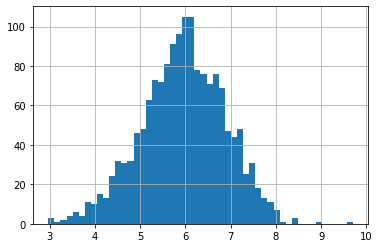

In [24]:
import matplotlib.pyplot as plt
data_hip = ata_all["HIPPOVOL"].hist(bins = 50)d
data_hip

In [25]:
data_labels['HIP_VOL']= data_all['HIPPOVOL']

AD seviyesine göre kaç HIP_VOL vakası gözlemlendiğini pivot tablosu şeklinde baktığımızda AD 0 ve 1 seviyelerinde yüksek vaka görülüyor.

In [26]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].count()

,HIP_VOL
CDRGLOB,
0,721
1,607
2,194
3,66


AD seviyesine göre HIP_VOL vakalarının ortalamasına baktığımızda AD seviyesi düştükçe HIP_VOL ortalamasının arttığını gözlemliyoruz.

In [27]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].mean()

,HIP_VOL
CDRGLOB,
0,6.304869
1,5.839063
2,5.323365
3,4.965071


Ortalamaya göre uzaklıklarına baktığımızda (standart sapma) değerimiz ne kadar küçükse bizim için o kadar iyi.

In [28]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].std()

,HIP_VOL
CDRGLOB,
0,0.757105
1,0.866157
2,0.974990
3,1.031115


Son olarak özet pivot tablosuna baktığımızda AD 0 ve 1 seviyesinde HIPPOVOL değişkeniyle aynı ölçüm değerlerini gösterdiğini söyleyebiliriz.

In [29]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].describe()

HIP_VOL                                                          \
          count      mean       std     min       25%      50%      75%   
CDRGLOB                                                                   
0         721.0  6.304869  0.757105  4.1340  5.781000  6.25570  6.84860   
1         607.0  5.839063  0.866157  3.0209  5.264750  5.81930  6.40115   
2         194.0  5.323365  0.974990  2.9719  4.579325  5.35495  5.97160   
3          66.0  4.965071  1.031115  3.1056  4.347850  4.84365  5.43490   

                 
            max  
CDRGLOB          
0        9.6965  
1        8.9606  
2        7.9945  
3        7.7950